In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# EDA

In [ ]:
items = pd.read_csv('data/items.csv')

In [ ]:
items.head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


In [ ]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB


In [ ]:
items.isnull().sum()

item_id             0
content_type        0
title               0
title_orig       4745
release_year       98
genres              0
countries          37
for_kids        15397
age_rating          2
studios         14898
directors        1509
actors           2619
description         2
keywords          423
dtype: int64

In [ ]:
items.nunique()

item_id         15963
content_type        2
title           15293
title_orig      10575
release_year      105
genres           2771
countries         687
for_kids            2
age_rating          6
studios            38
directors        7973
actors          12996
description     15619
keywords        15492
dtype: int64

Users

In [ ]:
users = pd.read_csv('data/users.csv')

In [ ]:
users.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


#### Interractions

In [ ]:
interactions = pd.read_csv('data/interactions.csv')

In [ ]:
interactions.head()

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0


In [ ]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   item_id        int64  
 2   last_watch_dt  object 
 3   total_dur      int64  
 4   watched_pct    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 208.9+ MB


In [ ]:
interactions.isnull().sum()

user_id            0
item_id            0
last_watch_dt      0
total_dur          0
watched_pct      828
dtype: int64

# Rec sys

In [ ]:
! pip install rectools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 4.9 MB/s 
     |████████████████████████████████| 60 kB 7.9 MB/s 
     |████████████████████████████████| 1.1 MB 57.7 MB/s 
     |████████████████████████████████| 13.4 MB 43.9 MB/s 
     |████████████████████████████████| 88 kB 9.5 MB/s 
     |████████████████████████████████| 310 kB 75.9 MB/s 
     |████████████████████████████████| 188 kB 56.2 MB/s 
  Created wheel for implicit: filename=implicit-0.4.4-cp38-cp38-linux_x86_64.whl size=3825456 sha256=39e7807ce422103c4cc6604d270e0616284a47791f0a83ca47d2647b010e889b
  Stored in directory: /root/.cache/pip/wheels/00/ac/67/6f4536c819ed560c2c7e17c0f7a920e3e50c26108616087d05
  Created wheel for lightfm: filename=lightfm-1.16-cp38-cp38-linux_x86_64.whl size=746151 sha256=82f9bd3617ddf9c447d14bff037143cf35d29d8fcd921ed1f478adf0ef2b75f4
  Stored in directory: /root/.cache/pip/wheels/ec/bb/51/9c487d021

In [ ]:
from rectools import Columns
from rectools.dataset import Dataset, Interactions

#### Prepare features for rec sys

In [ ]:
# prepare items for dataset
items.head()

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."


In [ ]:
# prepare year of release
_, bins = pd.qcut(items["release_year"], 10, retbins=True)
labels = bins[:-1]

In [ ]:
bins

array([1897., 1983., 2003., 2009., 2012., 2014., 2016., 2018., 2019.,
       2020., 2021.])

In [ ]:
year_feature = pd.DataFrame(
    {
        Columns.Item: items[Columns.Item],
        'value': pd.cut(items['release_year'], bins=bins, labels=labels),
        'feature': 'release_year',
    }
)

In [ ]:
year_feature.head()

,item_id,value,feature
0,10711,1983.0,release_year
1,2508,2012.0,release_year
2,10716,2009.0,release_year
3,7868,2014.0,release_year
4,16268,1897.0,release_year


In [ ]:
# prepare genre of items
items['genre'] = items['genres'].str.split(',')

In [ ]:
genre_feature = items[[Columns.Item, 'genre']].explode('genre')

In [ ]:
genre_feature.columns = [Columns.Item, 'value']
genre_feature['feature'] = 'genre'

In [ ]:
genre_feature.shape

(40637, 3)

In [ ]:
item_feat = pd.concat([genre_feature, year_feature])

In [ ]:
item_feat = item_feat[item_feat[Columns.Item].isin(interactions[Columns.Item])]

In [ ]:
item_feat = item_feat[item_feat[Columns.Item].isin(interactions[Columns.Item])]

In [ ]:
item_feat.shape

(55676, 3)

In [ ]:
# make interactions

In [ ]:
interactions.columns = [Columns.User, Columns.Item, Columns.Datetime, Columns.Weight, 'watched_pct']

### Make of validation  object

In [ ]:
from rectools.model_selection import TimeRangeSplitter
from rectools.metrics import MAP, calc_metrics

In [ ]:
n_folds = 3
unit = 'D'
n_units = 7

In [ ]:
interactions[Columns.Datetime] = pd.to_datetime(interactions[Columns.Datetime])

In [ ]:
last_date = interactions[Columns.Datetime].max().normalize()

In [ ]:
start_date = last_date - pd.Timedelta(n_folds * n_units - 1, unit=unit)

In [ ]:
periods = n_folds + 1
freq = '7D'

In [ ]:
date_range = pd.date_range(start=start_date, periods=periods, freq=freq, tz=last_date.tz)

In [ ]:
date_range

DatetimeIndex(['2021-08-02', '2021-08-09', '2021-08-16', '2021-08-23'], dtype='datetime64[ns]', freq='7D')

In [ ]:
inters = Interactions(interactions)

In [ ]:
spliter = TimeRangeSplitter(
    date_range=date_range,
    filter_already_seen=True,
    filter_cold_items=True,
    filter_cold_users=True,
)

In [ ]:
from copy import deepcopy

In [ ]:
metric = {'MAP@10': MAP(10)}

In [ ]:
def get_map(recommend_model, spliter):
    results = []
    
    for train_ids, test_ids, _ in spliter.split(inters):
        recommender = deepcopy(recommend_model)
        df_train = inters.df.iloc[train_ids]
        item_feat_train = item_feat[item_feat[Columns.Item].isin(df_train[Columns.Item])]
    
        dataset = Dataset.construct(
            interactions_df=df_train,
            user_features_df=None,
            item_features_df=item_feat_train,
            cat_item_features=['genre', 'release_year'],
        )
    
        df_test = inters.df.iloc[test_ids][Columns.UserItem]
        test_users = np.unique(df_test[Columns.User])
    
        recommender.fit(dataset)
        recs = recommender.recommend(
            users=test_users,
            dataset=dataset,
            k=10,
            filter_viewed=True,
        )
        
        result = calc_metrics(
            metric,
            reco=recs,
            interactions=df_test,
            prev_interactions=df_train
        )['MAP@10']
        
        results.append(result)
        
    return np.mean(results), np.std(results)
        

#### PopularRecommend

In [125]:
from rectools.models.popular import PopularModel

In [ ]:
from rectools.models.popular_in_category import PopularInCategoryModel

In [128]:
model = PopularModel()

In [129]:
get_map(model, spliter)

(0.08610618444346312, 0.003499111140397221)

 Среднее значение MAP@10 на фолдах - 0.086. Сделаем предсказание нашей моделью

In [ ]:
dataset = Dataset.construct(
        interactions_df=inters.df,
        user_features_df=None,
        item_features_df=item_feat,
        cat_item_features=['genre', 'release_year'],
    )

In [ ]:
model.fit(dataset)

Следующая проблема - это клиенты, впервые зашедшие на сайт, какую им предложить рекомендацию. Наше решение будет рекомендовать им 10 самых популярных продуктов на сайте




In [ ]:
cold_rec = interactions.item_id.value_counts().index[:10]

In [ ]:
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
test_users = np.unique(submission[Columns.User])

In [ ]:
known_test_users = submission[submission[Columns.User].isin(inters.df[Columns.User])][Columns.User].values

In [ ]:
unknown_test_users = submission[~submission[Columns.User].isin(inters.df[Columns.User])][Columns.User].values

In [ ]:
recs = model.recommend(
        users=known_test_users,
        dataset=dataset,
        k=10,
        filter_viewed=True,    
    )

In [ ]:
recs_for_known =  recs.groupby(['user_id']).agg({'item_id': lambda x: [i for i in x]})

In [ ]:
submission = submission.drop(columns=['item_id'])

In [ ]:
submission = pd.merge(submission, recs_for_known, how='left', left_on='user_id', right_on='user_id')

In [ ]:
submission.head()

,user_id,item_id
0,3,"[15297, 13865, 6809, 9996, 8636, 4740, 7571, 1..."
1,11,"[10440, 9728, 13865, 4151, 3734, 2657, 4880, 1..."
2,29,NaN
3,30,"[10440, 15297, 13865, 4151, 3734, 2657, 4880, ..."
4,33,NaN


In [ ]:
for row in submission.loc[submission.item_id.isnull(), 'item_id'].index:
    submission.at[row, 'item_id'] = cold_rec.values.tolist()

In [ ]:
submission.head()

,user_id,item_id
0,3,"[15297, 13865, 6809, 9996, 8636, 4740, 7571, 1..."
1,11,"[10440, 9728, 13865, 4151, 3734, 2657, 4880, 1..."
2,29,"[10440, 15297, 9728, 13865, 4151, 3734, 2657, ..."
3,30,"[10440, 15297, 13865, 4151, 3734, 2657, 4880, ..."
4,33,"[10440, 15297, 9728, 13865, 4151, 3734, 2657, ..."


In [ ]:
submission.to_csv('popular.csv', index=False)

На сабмите скор равен 0,0986670803; даже выше чем в оффлайне

In [127]:
# провалидируем модель
# сделаем hyperparametr tuning
for i in [7, 14, 28]:
  model = PopularModel(period=pd.Timedelta(i, unit='d'))
  spliter = TimeRangeSplitter(
    date_range=date_range,
    filter_already_seen=True,
    filter_cold_items=True,
    filter_cold_users=True,
  )
  avg, std = get_map(model, spliter)
  print(f'For {i} days period: MAP@10={avg}')

For 7 days period: MAP@10=0.09417924264256525
For 14 days period: MAP@10=0.09377646752742755
For 28 days period: MAP@10=0.09319499741153772


Лучший результат для 7 дней. Засабмитим его результат

In [132]:
# рекомендации для холодных (вновь пришедших клиентов)
cold_rec = interactions.item_id.value_counts().index[:10]

In [133]:
def make_submission(subm_name, model):
    submission = pd.read_csv('data/sample_submission.csv')
    
    dataset = Dataset.construct(
        interactions_df=inters.df,
        user_features_df=None,
        item_features_df=item_feat,
        cat_item_features=['genre', 'release_year'],
    )
    
    model.fit(dataset)
    
    known_test_users = submission[submission[Columns.User].isin(inters.df[Columns.User])][Columns.User].values
    unknown_test_users = submission[~submission[Columns.User].isin(inters.df[Columns.User])][Columns.User].values
    recs = model.recommend(
        users=known_test_users,
        dataset=dataset,
        k=10,
        filter_viewed=True,    
    )

    recs_for_known =  recs.groupby(['user_id']).agg({'item_id': lambda x: [i for i in x]})

    submission = submission.drop(columns=['item_id'])
    submission = pd.merge(submission, recs_for_known, how='left', left_on='user_id', right_on='user_id')

    for row in submission.loc[submission.item_id.isnull(), 'item_id'].index:
      submission.at[row, 'item_id'] = cold_rec.values.tolist()

    submission.to_csv(subm_name, index=False)

In [130]:
model = PopularModel(period=pd.Timedelta(7, unit='d'))

In [134]:
make_submission('popular_7days.csv', model)

получили наилучший скор: 0,1013026427

# popular covered by n% of unique users

In [ ]:
from scipy.stats import mode

In [ ]:
matrix = dataset.get_user_item_matrix()

In [ ]:
def get_top_items_covered_users(matrix, n_users=1000):
    
    assert matrix.format == 'csr'

    item_set = []
    covered_users = np.zeros(matrix.shape[0], dtype=bool)
    while covered_users.sum() < n_users: 
        top_item = mode(matrix[~covered_users].indices)[0][0] 
        item_set.append(top_item)
        covered_users += np.maximum.reduceat(matrix.indices==top_item, matrix.indptr[:-1], dtype=bool) 
    return item_set, covered_users

In [ ]:
item_set, covered_users = get_top_items_covered_users(matrix, n_users=600000)

In [ ]:
pop_covered = dataset.item_id_map.convert_to_external(item_set) 
pop_covered

array([10440, 15297,  9728, 13865,  2657,  4151,  3734,  6809,  4740,
        4880,  7571, 11237,  8636, 14741])

In [ ]:
rec = pop_covered[:10]

In [ ]:
submission = pd.read_csv('data/sample_submission.csv')

In [ ]:
for row in submission.loc[:, 'item_id'].index:
      submission.at[row, 'item_id'] = rec.tolist()

In [ ]:
submission.to_csv('covered_n_unique.csv', index=False)

Score: 0,087769148

# Popular in category

In [ ]:
from rectools.models.popular_in_category import PopularInCategoryModel

In [ ]:
item_model = PopularInCategoryModel(category_feature='genre', n_categories=5)

In [ ]:
item_feat.head()

,item_id,value,feature
0,10711,драмы,genre
0,10711,зарубежные,genre
0,10711,детективы,genre
0,10711,мелодрамы,genre
1,2508,зарубежные,genre


In [ ]:
from tqdm import tqdm

In [ ]:
for i in [5, 7, 10]:
  item_model = PopularInCategoryModel(category_feature='genre', n_categories=i)
  spliter = TimeRangeSplitter(
    date_range=date_range,
    filter_already_seen=True,
    filter_cold_items=True,
    filter_cold_users=True,
  )
  avg, std = get_map(item_model, spliter)
  print(f'For {i} categories: MAP@10={avg}')

For 5 categories: MAP@10=0.06450710908413212
For 7 categories: MAP@10=0.07077731911387251
For 10 categories: MAP@10=0.07562643334301358


на валидации лучше всего себя показала модель с 10 категориями, засабмитем ее

In [ ]:
pop_cat = PopularInCategoryModel(category_feature='genre', n_categories=10)

In [ ]:
make_submission('pop_cat10.csv', pop_cat)

Итоговое значение: 0,0974564434  , что несколько хуже чем у PopularModel

# Popular in category by user features

In [ ]:
dataset.get_user_item_matrix()

<962179x15706 sparse matrix of type '<class 'numpy.float32'>'
	with 5476251 stored elements in Compressed Sparse Row format>

In [ ]:
dataset.get_user_item_matrix()

In [ ]:
users.head()

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0


,item_id,value,feature
0,10711,драмы,genre
0,10711,зарубежные,genre
0,10711,детективы,genre
0,10711,мелодрамы,genre
1,2508,зарубежные,genre
...,...,...,...
15958,6443,2016.0,release_year
15959,2367,2019.0,release_year
15960,10632,2016.0,release_year
15961,4538,2018.0,release_year


# Дополнительно: SLIM

In [ ]:
from scipy.sparse import csr_matrix
from pandas.api.types import CategoricalDtype

inters_tmp = interactions.copy()
inters_tmp['count'] = 1

person_c = CategoricalDtype(sorted(inters_tmp.user_id.unique()), ordered=True)
thing_c = CategoricalDtype(sorted(inters_tmp.item_id.unique()), ordered=True)

row = inters_tmp.user_id.astype(person_c).cat.codes
col = inters_tmp.item_id.astype(thing_c).cat.codes

user2item = csr_matrix((inters_tmp["count"], (row, col)), \
                           shape=(person_c.categories.size, thing_c.categories.size))

In [ ]:
from sklearn.linear_model import ElasticNet
from scipy import sparse

In [ ]:
from tqdm import tqdm

In [ ]:
class SLIM:

  def __init__(self,
               l1_penalty=0.1,
               l2_penalty=0.1,
               n_top=10,
               ):
    self.l1_penalty = l1_penalty
    self.l2_penalty = l2_penalty
    self.l1_ratio =  self.l1_penalty / (self.l1_penalty + self.l2_penalty)
    self.n_top = n_top

    self.dataset = None
    self.model = None
    self.W_sparse = None


  def fit(self, X):
    self.dataset  = X
    n_items = X.shape[1]

    self.dataset = X.tocsc().astype(np.float32)

    self.model = ElasticNet(
          alpha=0.1,
          l1_ratio=self.l1_ratio,
          copy_X=False,
          fit_intercept=False,
    )

    vals, rows, cols = [], [], []

    for j in tqdm(range(n_items)):
      y = X[:, j].toarray()

      start = X.indptr[j]
      end = X.indptr[j + 1]
      tmp = X.data[start:end].copy()

      X.data[start:end] = 0.0

      self.model.fit(X, y)

      non_zero_indexes = self.model.coef_ > 0.0
      vals.extend(self.model.coef_[non_zero_indexes])
      rows.extend(np.arange(n_items)[non_zero_indexes])
      cols.extend(np.ones(non_zero_indexes.sum()) * j)

      X.data[start:end] = tmp
    
    self.W_sparse = sparse.csc_matrix(
        (vals, (rows, cols)), 
        shape=(n_items, n_items),
        dtype=np.float32
        )
    
  def recomend(self, user_id):
    user_profile = self.dataset[user_id]
    scores = user_profile.dot(self.W_sparse).toarray().ravel()
    rankings = scores.argsort()[::-1]

    return rankings[:self.n_top]

In [ ]:
slim = SLIM()

In [72]:
slim.fit(user2item)

100%|██████████| 15706/15706 [1:23:32<00:00,  3.13it/s]


In [73]:
submission = pd.read_csv('data/sample_submission.csv')

In [89]:
known_users = submission[submission[Columns.User].isin(interactions[Columns.User])][Columns.User].values

In [ ]:
# наш алгоритм выдает принимает рекомендации по индексу пользователя в матрице
# и выдает значения items по их номеру столбцов в нашей матрице W
# создадим два словаря перевода  user_id d номер строки в матрице
# и перевода номера столбца в iten_id

In [95]:
train_users_amount = user2item.shape[0]
train_items_amount = user2item.shape[1]

In [106]:
train_users = np.sort(np.unique(interactions.user_id))
train_items = np.sort(np.unique(interactions.item_id))

In [107]:
user2index = {train_users[i]: i for i in range(train_users_amount)}

In [117]:
def make_recomendation(user_id):
  if user_id in known_users:
    rec_items = slim.recomend(user2index[user_id]).tolist()
    rec_items = [train_items[i] for i in rec_items]
  else:
    rec_items = cold_rec.tolist()
  return rec_items

In [118]:
submission['item_id'] = submission.user_id.apply(lambda x: make_recomendation(x))

In [119]:
submission.head()

,user_id,item_id
0,3,"[10440, 9728, 4151, 3734, 2657, 4880, 5503, 55..."
1,11,"[15297, 16518, 5493, 5507, 5506, 5505, 5504, 5..."
2,29,"[10440, 15297, 9728, 13865, 4151, 3734, 2657, ..."
3,30,"[9728, 16518, 5510, 5508, 5507, 5506, 5505, 55..."
4,33,"[10440, 15297, 9728, 13865, 4151, 3734, 2657, ..."


In [120]:
submission.to_csv('slim_results.csv', index=False)

Итоговый скор: 0,0736557153; не превосходит показатели popular моделей. Модель не валидировал (так как в силу неоптимизированности обучение занимает большое время)

# Итог: мы убедились что при достаточно большом количестве данных, popularity модели показывают хорошие результаты, и могут служить отличными baselines

# Итоговый скор: 0,1013026427

Дополнительно: попробуем рекомендовать самое всегда самое популярные значения в interactions

In [122]:
submission['item_id'] = submission.user_id.apply(lambda x: cold_rec.tolist())

In [123]:
submission.to_csv('naive.csv', index=False)

Скор: 0,0892477921


## Визуализация результатов

In [144]:
liderboard_results = {
    'Popular in 7 days': 0.1013026427,
    'Popular default': 0.0986670803, 
    'Popular in category, 10 cats': 0.0974564434,
    'naive - the most popular items ': 0.0892477921,
    'n % of unique users, 1000 users': 0.087769148,
    'SLIM': 0.0736557153
}

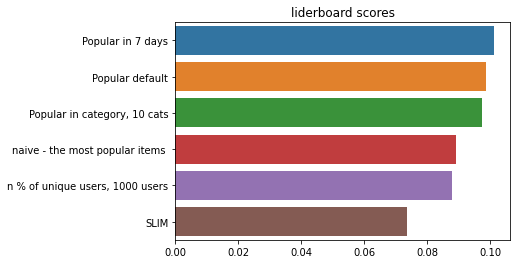

In [151]:
sns.barplot(y=list(liderboard_results.keys()), x=list(liderboard_results.values()), orient='h')
plt.title('liderboard scores')
plt.savefig('baseline_liderboard_results.png')
plt.show()

In [156]:
validation_submit = {
    'model': ['Popular in 7 days', 
              'Popular default', 
              'Popular in category, 10 cats', 
              'Popular in 7 days', 
              'Popular default', 
              'Popular in category, 10 cats',
              ],
    'score': [
        0.09417924264256525,
        0.08610618444346312,
        0.07562643334301358,
        0.1013026427,
        0.0986670803,
        0.0974564434
    ],
    'type': [
        'validation',
        'validation',
        'validation',
        'submit',
        'submit',
        'submit',
    ]
}

In [157]:
valudation_submit = pd.DataFrame(validation_submit)
valudation_submit

,model,score,type
0,Popular in 7 days,0.094179,validation
1,Popular default,0.086106,validation
2,"Popular in category, 10 cats",0.075626,validation
3,Popular in 7 days,0.101303,submit
4,Popular default,0.098667,submit
5,"Popular in category, 10 cats",0.097456,submit


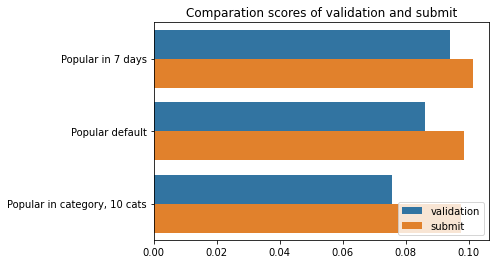

In [160]:
sns.barplot(data=validation_submit, x='score', y='model', hue='type')
plt.title('Comparation scores of validation and submit')
plt.savefig('validate_vs_submit.png')